# Time Series - V (ARIMA Models)

ARIMA models or Auto Regressive Integrated Moving Average Models are very similar to ARMA models, in a sense that they too are a combination of AR and MA models where the order of AR and MA models may or may not be different. ARIMA(p,d,q) means a model with AR part of order p, MA part of order q.

Integration order d is the total number of times we need to do differencing to make the time series stationary which is a discrete white noise series.

So to conclude, for an ARIMA(p,d,q) model, we first take the difference of time series d number of times and then try to fit an ARMA(p,q) model as discussed in this notebook: https://github.com/kushkul/Time-Series/blob/master/Time%20Series%20-%20IV%20(ARMA%20Models).ipynb


** Simulating a ARIMA(2,1,1) model **

In [1]:
#importing the required packages

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.tsa.api as smt
import statsmodels.stats as sms
from plotting_func import tsplot

import warnings
warnings.filterwarnings('ignore')

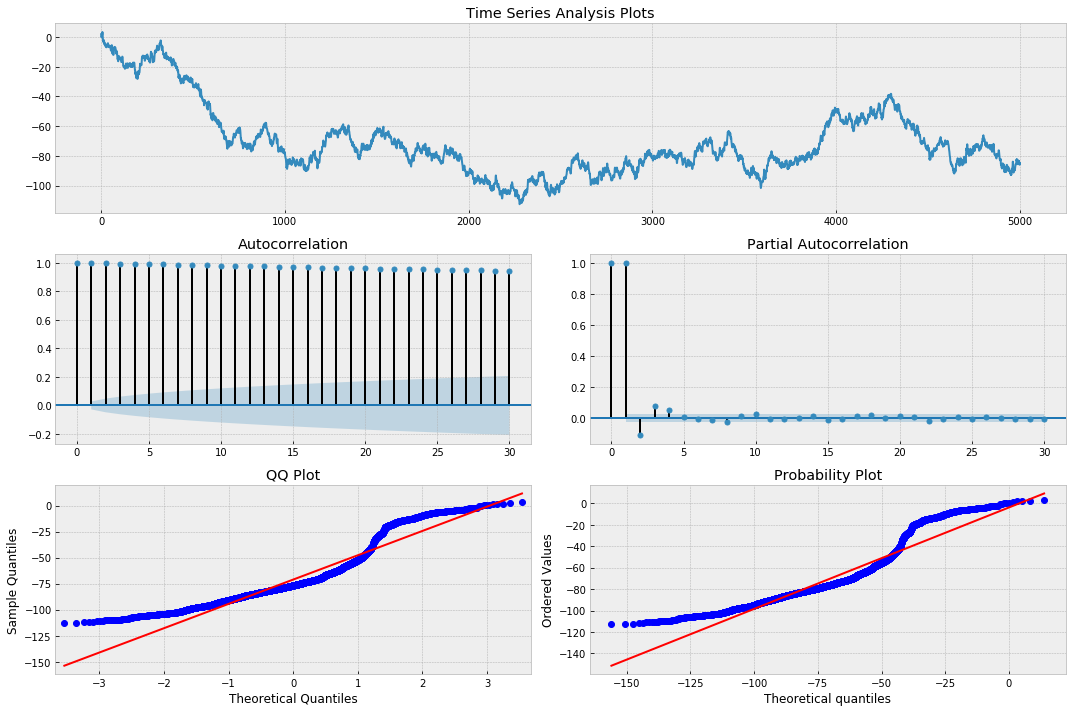

In [2]:
alphas = np.array([0.5, -0.25])
betas = np.array([-0.25])

max_lag = 30
n = int(5000)
burn = 2000

ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma21 = smt.arma_generate_sample(ar = ar, ma = ma, nsample = n, burnin = burn)
arima211 = arma21.cumsum()

_ = tsplot(arima211, lags = max_lag)

**Fitting an ARIMA(p,d,q) model. **

We pick the model with the parameters which has lowest AIC value among the group of models.

50487.19046032162 0 0 1
14250.328407629087 0 1 1
14226.406143660304 0 1 2
14172.731480457795 0 1 3
14166.464289047222 0 1 4
14580.006676388135 1 0 0
14263.023985585942 1 0 1
14327.50076149427 1 1 0
14238.80452772967 1 1 1
14185.756058684205 1 1 2
14168.912497211406 1 1 3
14167.673746021792 1 1 4
14340.191373106125 2 0 0
14251.528634743809 2 0 1
14177.654764264673 2 1 0
14161.857512334813 2 1 1
14163.56480608766 2 1 2
14164.140386105966 2 1 3
14166.031382063875 2 1 4
14190.44834825735 3 0 0
14163.065998962293 3 1 0
14163.633700900686 3 1 1
14163.91319283979 3 1 2
14175.886926410909 4 0 0
14163.303582368311 4 1 0
14165.300284970157 4 1 1
14165.857048417942 4 1 2
14167.613927970418 4 1 3
AIC: 14161.858, order = (2, 1, 1)


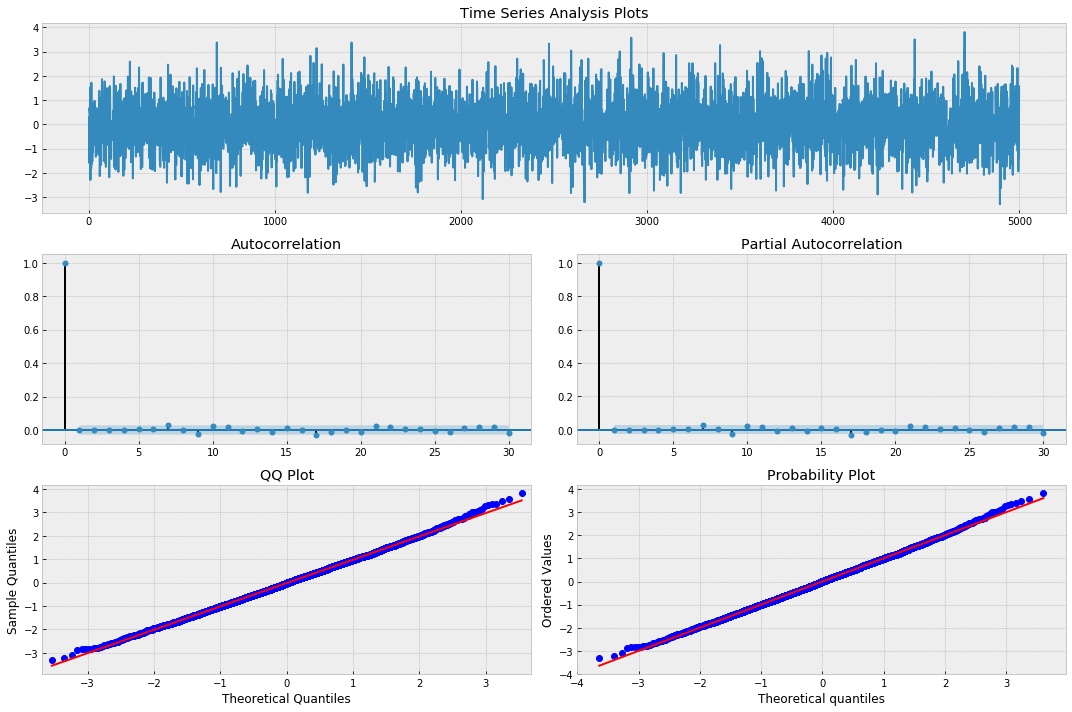

In [3]:
best_aic = np.inf
best_order = None
best_model = None

pq_range = range(5)
d_range = range(2)

for i in pq_range:
    for d in d_range:
        for j in pq_range:
            try:
                temp_model = smt.ARIMA(arima211, order = (i,d,j)).fit(method = 'mle',
                                                                     trend = 'nc')
                temp_aic = temp_model.aic
                print(temp_aic, i,d,j)
                if temp_aic < best_aic:
                    best_aic = temp_aic
                    best_model = temp_model
                    best_order = (i,d,j)
            except:
                continue

print('AIC: %6.3f, order = %s' %(best_aic, best_order))

_ = tsplot(best_model.resid, lags = 30)

As you can see above, there are a lot of models along with our (2,1,1) model with AIC ~14160. We get the idea, the lower the AIC, the better the model.

**Performing LJung-Box and Jarque-Berra Tests **

In [4]:
sms.diagnostic.acorr_ljungbox(best_model.resid, lags = [20], boxpierce = False)

from statsmodels.stats.stattools import jarque_bera

score, pvalue,_,_ = jarque_bera(best_model.resid)

if pvalue< 0.10:
    print('The residuals may not be normally distributed')
else:
    print('The residuals seem to be normally distributed')

The residuals may not be normally distributed
